In [1]:
import numpy as np
import pandas as pd

from scipy.optimize import minimize

from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
# warnings.filterwarnings("ignore")

#### Logistic Regression

In [2]:
df1 = pd.read_csv('../input/andrew_ng/ex2data1.txt', header=None, names=['exam1', 'exam2', 'admission'])
df1.head()

,exam1,exam2,admission
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


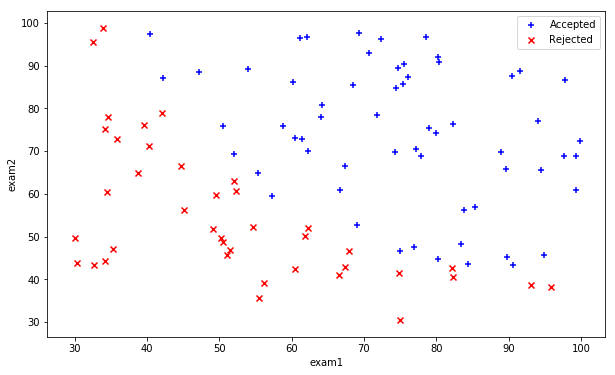

In [3]:
pos = df1[df1.admission.isin([1])]
neg = df1[df1.admission.isin([0])]

plt.figure(figsize=(10,6))
plt.scatter(pos['exam1'], pos['exam2'], c='b', marker='+', label='Accepted')
plt.scatter(neg['exam1'], neg['exam2'], c='r', marker='x', label='Rejected')
plt.xlabel('exam1')
plt.ylabel('exam2')
plt.legend();

In [4]:
df1.insert(0, 'ones', 1)

In [5]:
def sigm(z):
    return 1/(1+np.exp(-z))

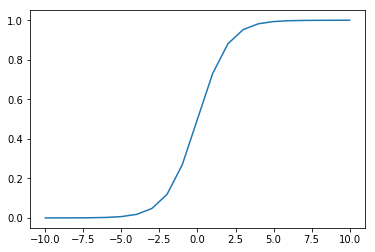

In [6]:
xx = np.linspace(-10, 10,21)
plt.plot(xx, sigm(xx))

In [7]:
def cost(theta, X, y):
    theta = theta.reshape(-1,1)
    hx = sigm(X.dot(theta))
    m, n = X.shape
    part1 = y.T.dot(np.log(hx))
    part2 = (1-y).T.dot(np.log(1-hx))
    return -(part1 + part2)/m

In [8]:
X = np.array(df1.iloc[:,:-1])
y = np.array(df1.iloc[:,-1:])

theta = np.zeros(X.shape[1])

"Cost is : {}".format(cost(theta, X, y))

'Cost is : [[0.69314718]]'

In [9]:
def gradient_descent(theta, X, y):
    m = y.size
    theta = theta.reshape(-1, 1)
    hx = sigm(X.dot(theta))
    theta = (1/m)*X.T.dot((hx-y))
    return theta.flatten()

In [10]:
gradient_descent(theta, X, y)

array([ -0.1       , -12.00921659, -11.26284221])

In [11]:
res = minimize(cost, theta, args=(X,y), method=None, jac=gradient_descent, options={'maxiter':400})  # refer documentation
res  # res.x is our optimal theta

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


      fun: 0.2034977015894438
 hess_inv: array([[ 3.31474479e+03, -2.63892205e+01, -2.70237122e+01],
       [-2.63892205e+01,  2.23869433e-01,  2.02682332e-01],
       [-2.70237122e+01,  2.02682332e-01,  2.35335117e-01]])
      jac: array([-9.52476818e-09, -9.31921317e-07, -2.82608927e-07])
  message: 'Optimization terminated successfully.'
     nfev: 31
      nit: 23
     njev: 31
   status: 0
  success: True
        x: array([-25.16133284,   0.2062317 ,   0.2014716 ])

In [12]:
def predict(theta, X):
    return list(map(lambda x: 1 if x>0.5 else 0, np.dot(X, theta)))

In [13]:
"Accuracy: {}%".format(100*sum([1 if x==y else 0 for x, y in zip(predict(res.x.T, X), y)])/y.size)

'Accuracy: 89.0%'

#### Regularization

In [14]:
df2 = pd.read_csv('../input/andrew_ng/ex2data2.txt', header=None, names=['test1', 'test2', 'accepted'])
df2.head()

,test1,test2,accepted
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


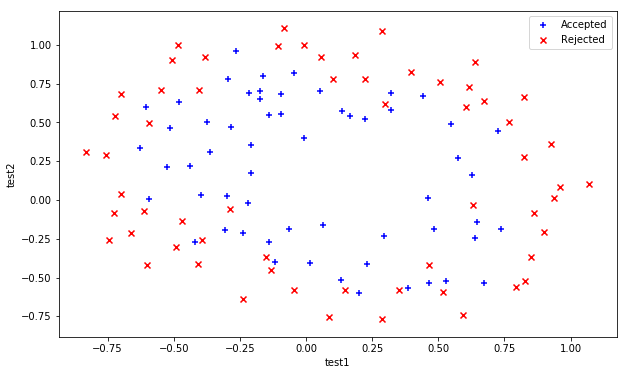

In [15]:
pos = df2[df2.accepted.isin([1])]
neg = df2[df2.accepted.isin([0])]

plt.figure(figsize=(10,6))
plt.scatter(pos['test1'], pos['test2'], c='b', marker='+', label='Accepted')
plt.scatter(neg['test1'], neg['test2'], c='r', marker='x', label='Rejected')
plt.xlabel('test1')
plt.ylabel('test2')
plt.legend();

In [16]:
# to generate new feature

poly = PolynomialFeatures(6)

X_new = poly.fit_transform(df2.iloc[:,:-1])
print(X_new.shape)

y2 = np.array(df2.iloc[:,-1:])

(118, 28)


In [17]:
def cost_reg(theta, reg, X, y):
    m = y.size
    theta = theta.reshape(-1,1)
    hx = sigm(X.dot(theta))
    cost1 = y.T.dot(np.log(hx))
    cost0 = (1-y).T.dot(np.log((1-hx)))
    return -(1/m) * (cost1+cost0) + reg/(2*m) * theta[1:,:].T.dot(theta[1:,:])

In [18]:
def gradient_reg(theta, reg, X, y):
    m = y.size
    theta = theta.reshape(-1,1)
    hx = sigm(X.dot(theta))
    result = (1/m) * X.T.dot(hx-y) + (reg/m)*np.r_[[[0]],theta[1:].reshape(-1,1)]
    return result.flatten()

In [19]:
theta = np.zeros(X_new.shape[1])
gradient_reg(theta, 1, X_new, y2)

array([8.47457627e-03, 1.87880932e-02, 7.77711864e-05, 5.03446395e-02,
       1.15013308e-02, 3.76648474e-02, 1.83559872e-02, 7.32393391e-03,
       8.19244468e-03, 2.34764889e-02, 3.93486234e-02, 2.23923907e-03,
       1.28600503e-02, 3.09593720e-03, 3.93028171e-02, 1.99707467e-02,
       4.32983232e-03, 3.38643902e-03, 5.83822078e-03, 4.47629067e-03,
       3.10079849e-02, 3.10312442e-02, 1.09740238e-03, 6.31570797e-03,
       4.08503006e-04, 7.26504316e-03, 1.37646175e-03, 3.87936363e-02])

In [20]:
# for different values of C
for i in [0, 1, 100]:
    C = i
    res = minimize(cost_reg, theta, args=(C, X_new, y2), method=None, jac=gradient_reg, options={'maxiter':3000})
    print("Reg: {}, Accuracy: {:.2f}%".format(C, 100*sum([1 if x==y else 0 for x, y in zip(predict(res.x.T, X_new), y2)])/y2.size))

Reg: 0, Accuracy: 88.98%
Reg: 1, Accuracy: 79.66%
Reg: 100, Accuracy: 50.85%


#### Using the sklearn Logistic Regression

In [21]:
# without feature mapping
log_reg = linear_model.LogisticRegression()
log_reg.fit(df2.iloc[:,:-1], df2.iloc[:,-1:].values.ravel())

log_reg.score(df2.iloc[:,:-1], df2.iloc[:,-1].ravel())

0.5423728813559322

In [22]:
# with feature mapping
log_reg = linear_model.LogisticRegression()
log_reg.fit(X_new, y2.ravel())

log_reg.score(X_new, y2.ravel())

0.8305084745762712